In [3]:
import numpy as np

In [4]:
class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    -------------
    eta : float
        学習率（0.0より大きく1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング回数
        
    属性
    -------------
    w_ : 1次元配列
        適合後の重み
    error_ : リスト
        各エポックでの誤分類数
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """トレーニングデータに適合される
        
        パラメータ
        -------------
        X : { 配列のようなデータ構造 }, shape = { n_samples, n_features}
            トレーニングデータ
            n_sampleはサンプルの個数、n_featureは特徴量の個数
        Y : 配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y): # 各サンプルで重みを更新
                
                # 重み w の更新
                # 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                
                # 重み w0 の更新
                self.w_[0] += update
                
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

# エポックはデータセットのトレーニング回数

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
import matplotlib.pyplot as plt
import numpy as np

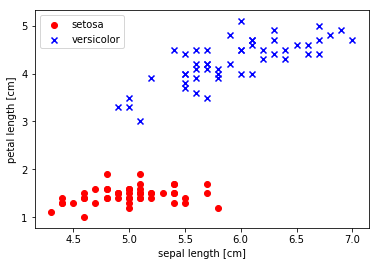

In [9]:
y = df.iloc[0:100,4].values
# Iris-setosaを-1,Iris-Virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1，3列目の抽出
X = df.iloc[0:100, [0, 2]].values
# 品種setosaのプロット（赤の○）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（青の×）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

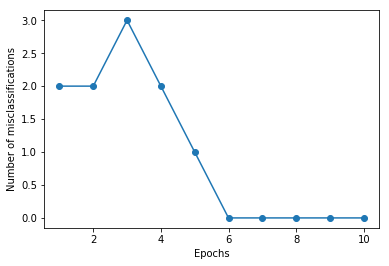

In [10]:
# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
# 図の表示
plt.show()

# 2次元のデータセットの決定境界を可視化しよう

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

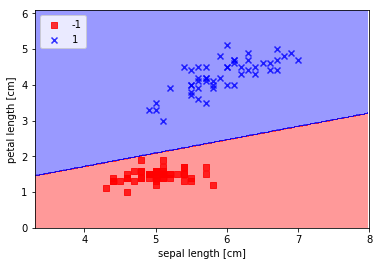

In [13]:
# 境界線のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
plt.xlim(X.min() + 2.3,X.max() + 1)
# 図の表示
plt.show()

線形の決定境界によってクラスを完全に分割できない場合は、エポック数の最大値を設定しない限り、重みの更新はいつまでも更新され続けることになる

# 2.4 ADALINEと学習の収束

ADALINEの学習規則とRosenblattのパーセプトロンの主な違いは重みの更新方法にある。

# 2.5 勾配降下法によるコスト関数の最小化

教師あり機械学習のアルゴリズムを構成する主な要素の1つに、学習過程で最適化される目的関数を定義する
目的関数は最小化したいコスト関数
誤差平方和、線形活性化関数、微分可能、凸関数、勾配降下法（強力な最適化アルゴリズム）

# 2.5.1 ADALINEをPythonで実装する

In [14]:
class AdalineGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    --------------
    eta : float
        学習率（0.0より大きく1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング回数
        
    属性
    --------------
    w_ : 1次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
        
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        -------------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数、n_featureは特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的変数
            
        戻り値
        ----------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):  # トレーニング回数分トレーニングデータを反復
            # 活性化関数の出力の計算
            output = self.net_input(X)
            # 誤差の計算
            errors = (y - output)
            # wの更新
            #
            self.w_[1:] += self.eta * X.T.dot(errors)
            # w0の更新
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum() / 2.0
            # コストの格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

パーセプトロンのように、個々のトレーニングサンプルを評価した後に重みを更新するのではなく、
トレーニングデータセット全体を用いて勾配を計算する

2つの学習率を用いて、エポック数に対するコストをプロットしてむる

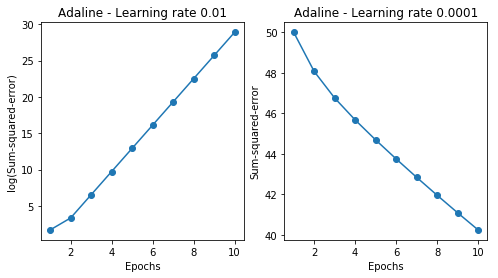

In [15]:
# 描画領域を1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# 勾配降下法によるADALINEの学習（学習率 eta=0.01）
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
# 勾配降下法によるADALINEの学習（学習率 eta=0.0001）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1,len(ada2.cost_)+1), ada2.cost_, marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
# 図の表示
plt.show()

結果として得られたコスト関数のグラフからわかるように、2種類の問題が発生している。

左のグラフは、選択した学習率が大きすぎるとどうなるかを示している。
選択した学習率が大きすぎると大局的最小値を「超えて」しまうため、コスト関数を最小化するどころか、エポックごとに誤差平方和が増えている。

右のグラフを見ると、コストが減少することが分かる。
ただし、選択された学習率η=0.0001は非常に小さいため、アルゴリズムを収束させるには、相当数のエポックが必要になる。

勾配降下法は特徴量のスケーリングに効果的なアルゴリズムの一つ

ここでは標準化というスケーリング手法を用いる。
このスケーリング手法はデータに用順正規分布の特徴を与える。その特徴とは、各特徴量の平均を0都市、標準偏差を1にするというもの。

In [16]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

meanメソッドとstdメソッドは、NumPyのクラスndarrayのメソッドであり、それぞれ平均と標準偏差を計算する。

まず、行列XをNumPyのcopy関数でコピーし、オブジェクトX_stdを生成している。
これは、いわゆるディープコピーであり、X_stdを変更してもXは影響を受けない。
一方で、単純に=演算子を用いてX_stdを生成するといわゆるシャローコピーとなり、X_stdに対数変更がXにも及ぶ


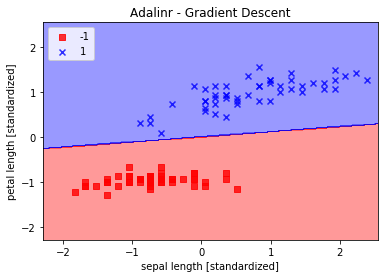

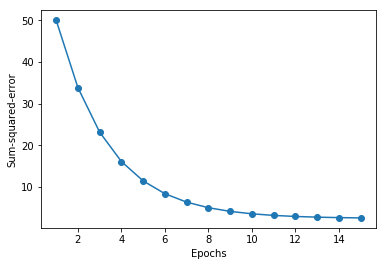

In [19]:
# 勾配降下法によるADALINEの学習（標準化後、学習率 eta=0.01）
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの適合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adalinr - Gradient Descent')
# 軸のラベル設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()
# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
# 図の表示
plt.show()

グラフから、標準化された特徴量を学習率η=0.01でトレーニングした後、ADALINEが収束していることが分かる。
ただし、すべてのサンプルが正しく分類されたとしても、誤差平方和が依然として0ではないことに注意。

# 2.6 大規模な機械学習と確率的勾配降下法

トレーニングデータセット全体から計算された勾配とは逆方向に進むことにより、コスト関数を最小化する方法をやった。（バッチ勾配降下法）
バッチ勾配降下法の実行では、大局的最小値に1ステップ近づくたびにトレーニングデータ全体を再び評価する必要がある

バッチ勾配降下法のアルゴリズムの代わりによく用いられるのは、確率的勾配降下法
このアルゴリズムは逐次的勾配降下法やオンライン勾配降下法と呼ばれる

ミニバッチ学習は、バッチ勾配降下法と確率的勾配降下法の折衷案
ミニバッチ学習については、トレーニングデータの一部にバッチ勾配降下法を適用するものとして解釈
バッチ勾配降下法に対する利点として、ミニバッチのほうが重荷の更新頻度が高いため、より素早く収束させられることが挙げられる

In [34]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    ------------
    eta : float
        学習率（0.0より大きく1.0以下に値）
    n_iter : int
        トレーニングデータのトレーニング回数
        
    属性
    ----------
    x_ : 1次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類数
    shuffle : bool（デフォルト : True）
        循環を回避するために各エポックでトレーニングデータをシャッフル
    random_state : int（デフォルト : None）
        シャッフルに使用するrandom_stateを設定し、重みを初期化
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 重み初期化フラグはFalseに設定
        self.w_initialized = False
        # 各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        # 引数random_stateが指定された場合は乱数種を設定
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        """トレーニングデータに適合させる
            
        パラメータ
        -----------
        X : { 配列のようなデータ構造 }, shape = [n_samples, n_features]
           トレーニングデータ
            n_sampleはサンプルの個数、n_featureは特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的関数
                
        戻り値
        -----------
        self : object
         
        """
        # 重みベクトルの生成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの生成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストの計算
            ave_cost = sum(cost) / len(y)
            # 平均コストを格納
            self.cost_.append(ave_cost)
        return self
        
    def partial_fit(self, X, y):
        """重みを再初期化することなくとれにングデータに適合させる"""
        # h曽木化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        # 目的変数yの要素数が2以上の場合は
        # 化kスサンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的変数ｙの要素数が2以上の場合は
        # 各サンプルの特徴量Xと目的変数yで重みを更新
        else:
            self._upgrade in zip(X, target)
        return self
        
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
        
    def _initialize_weights(self, m):
        """重みを0に初期化"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
            
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        # 活性化関数の出力の計算
        output = self.net_input(xi)
        # 誤差の計算
        error = (target - output)
        # 重みwの更新
        self.w_[1:] += self.eta * xi.dot(error)
        # 重みw0の更新
        self.w_[0] += self.eta * error
        # コストの計算
        cost = 0.5 * error**2
        return cost
        
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)
        
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

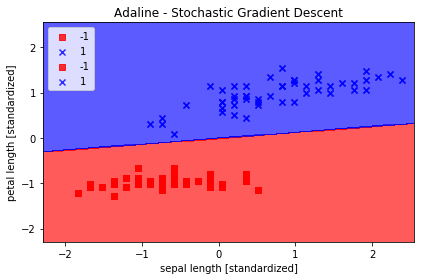

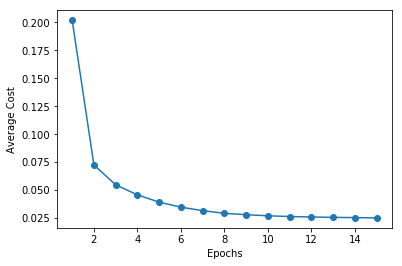

In [36]:
# 確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# モデルへの適合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
plt.tight_layout()
# プロットの表示
plt.show()
# エポックとコストの折れ線グラフのプロット
plt.plot(range(1,len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
# プロットの表示
plt.show()

平均コストがすぐに減少することが分かる